In [21]:
from functools import reduce

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from lol_fandom import get_tournaments, get_match_schedule


pd.set_option("display.max_columns", None)

In [2]:
def get_rc(i, cols):
    r = i // cols + 1
    c = i % cols + 1

    return (r, c)


def get_rows_columns(df, c=5):
    COLUMNS = c
    d, m = divmod(df.shape[0], COLUMNS)
    ROWS = d + (1 if m > 0 else m)

    return ROWS, COLUMNS


def get_fig_subplots(df, ROWS, COLUMNS):
    fig = make_subplots(
        rows=ROWS,
        cols=COLUMNS,
        subplot_titles=df.index.values,
        specs=[[{"type": "polar"} for _ in range(COLUMNS)] for _ in range(ROWS)],
    )

    return fig


def get_min_max_value(df, columns):
    min_value = df[columns].unstack().min()
    max_value = df[columns].unstack().max()

    return min_value, max_value


def get_theta_list(df, name, origin_columns):
    return [
        f"{col} - {round(value, ndigits=2)} | {int(standing)}"
        for col, value, standing in zip(
            origin_columns,
            df.loc[name, origin_columns].values,
            df[origin_columns].rank(method="min", ascending=False).loc[name].values,
        )
    ]

In [3]:
# SCALER = StandardScaler
SCALER = MinMaxScaler
# SCALER = MaxAbsScaler

In [4]:
teams_stats = pd.read_csv("./csv/stats/teams.csv", index_col="Team")
print(teams_stats.shape)
teams_stats.head()

(10, 12)


,Games,Win,Loss,WinRate,KD,CKPM,GameDuration,WinGameDuration,LossGameDuration,GPM,GDPM,KPM
Team,,,,,,,,,,,,
DRX,11.0,1.0,10.0,0.090909,0.346591,0.748837,28.746970,34.450000,28.176667,1562.023335,-429.826947,0.168080
Dplus KIA,12.0,7.0,5.0,0.583333,1.457447,0.631555,30.906944,30.061905,32.090000,1837.881009,114.495395,0.374791
Gen.G,12.0,10.0,2.0,0.833333,1.658824,0.673471,27.709722,27.840000,27.058333,1936.876723,259.105160,0.424899
Hanwha Life Esports,13.0,8.0,5.0,0.615385,1.353982,0.645846,31.867949,33.872917,28.660000,1826.202146,80.451420,0.375602
KT Rolster,12.0,9.0,3.0,0.750000,1.588889,0.718916,27.948611,28.159259,27.316667,1917.934730,181.627248,0.456530


In [5]:
scaler = SCALER()
origin_columns = ["KD", "CKPM", "KPM", "GPM", "GDPM"]
columns = ["_" + col for col in origin_columns]
teams_stats[columns] = scaler.fit_transform(teams_stats[origin_columns])
teams_stats.head()

,Games,Win,Loss,WinRate,KD,CKPM,GameDuration,WinGameDuration,LossGameDuration,GPM,GDPM,KPM,_KD,_CKPM,_KPM,_GPM,_GDPM
Team,,,,,,,,,,,,,,,,,
DRX,11.0,1.0,10.0,0.090909,0.346591,0.748837,28.746970,34.450000,28.176667,1562.023335,-429.826947,0.168080,0.000000,1.000000,0.000000,0.000000,0.000000
Dplus KIA,12.0,7.0,5.0,0.583333,1.457447,0.631555,30.906944,30.061905,32.090000,1837.881009,114.495395,0.374791,0.846539,0.520182,0.716626,0.735908,0.790096
Gen.G,12.0,10.0,2.0,0.833333,1.658824,0.673471,27.709722,27.840000,27.058333,1936.876723,259.105160,0.424899,1.000000,0.691667,0.890341,1.000000,1.000000
Hanwha Life Esports,13.0,8.0,5.0,0.615385,1.353982,0.645846,31.867949,33.872917,28.660000,1826.202146,80.451420,0.375602,0.767693,0.578647,0.719437,0.704752,0.740680
KT Rolster,12.0,9.0,3.0,0.750000,1.588889,0.718916,27.948611,28.159259,27.316667,1917.934730,181.627248,0.456530,0.946706,0.877592,1.000000,0.949468,0.887539


In [18]:
teams_stats['K/CK'] = teams_stats['KPM'].divide(teams_stats['CKPM'])
teams_stats.head()

,Games,Win,Loss,WinRate,KD,CKPM,GameDuration,WinGameDuration,LossGameDuration,GPM,GDPM,KPM,_KD,_CKPM,_KPM,_GPM,_GDPM,K/CK
Team,,,,,,,,,,,,,,,,,,
DRX,11.0,1.0,10.0,0.090909,0.346591,0.748837,28.746970,34.450000,28.176667,1562.023335,-429.826947,0.168080,0.000000,1.000000,0.000000,0.000000,0.000000,0.224455
Dplus KIA,12.0,7.0,5.0,0.583333,1.457447,0.631555,30.906944,30.061905,32.090000,1837.881009,114.495395,0.374791,0.846539,0.520182,0.716626,0.735908,0.790096,0.593441
Gen.G,12.0,10.0,2.0,0.833333,1.658824,0.673471,27.709722,27.840000,27.058333,1936.876723,259.105160,0.424899,1.000000,0.691667,0.890341,1.000000,1.000000,0.630909
Hanwha Life Esports,13.0,8.0,5.0,0.615385,1.353982,0.645846,31.867949,33.872917,28.660000,1826.202146,80.451420,0.375602,0.767693,0.578647,0.719437,0.704752,0.740680,0.581566
KT Rolster,12.0,9.0,3.0,0.750000,1.588889,0.718916,27.948611,28.159259,27.316667,1917.934730,181.627248,0.456530,0.946706,0.877592,1.000000,0.949468,0.887539,0.635025


C:\Users\pjm58\AppData\Local\Temp\ipykernel_49340\879664895.py:6: RuntimeWarning: divide by zero encountered in divide
  x = 100 / y


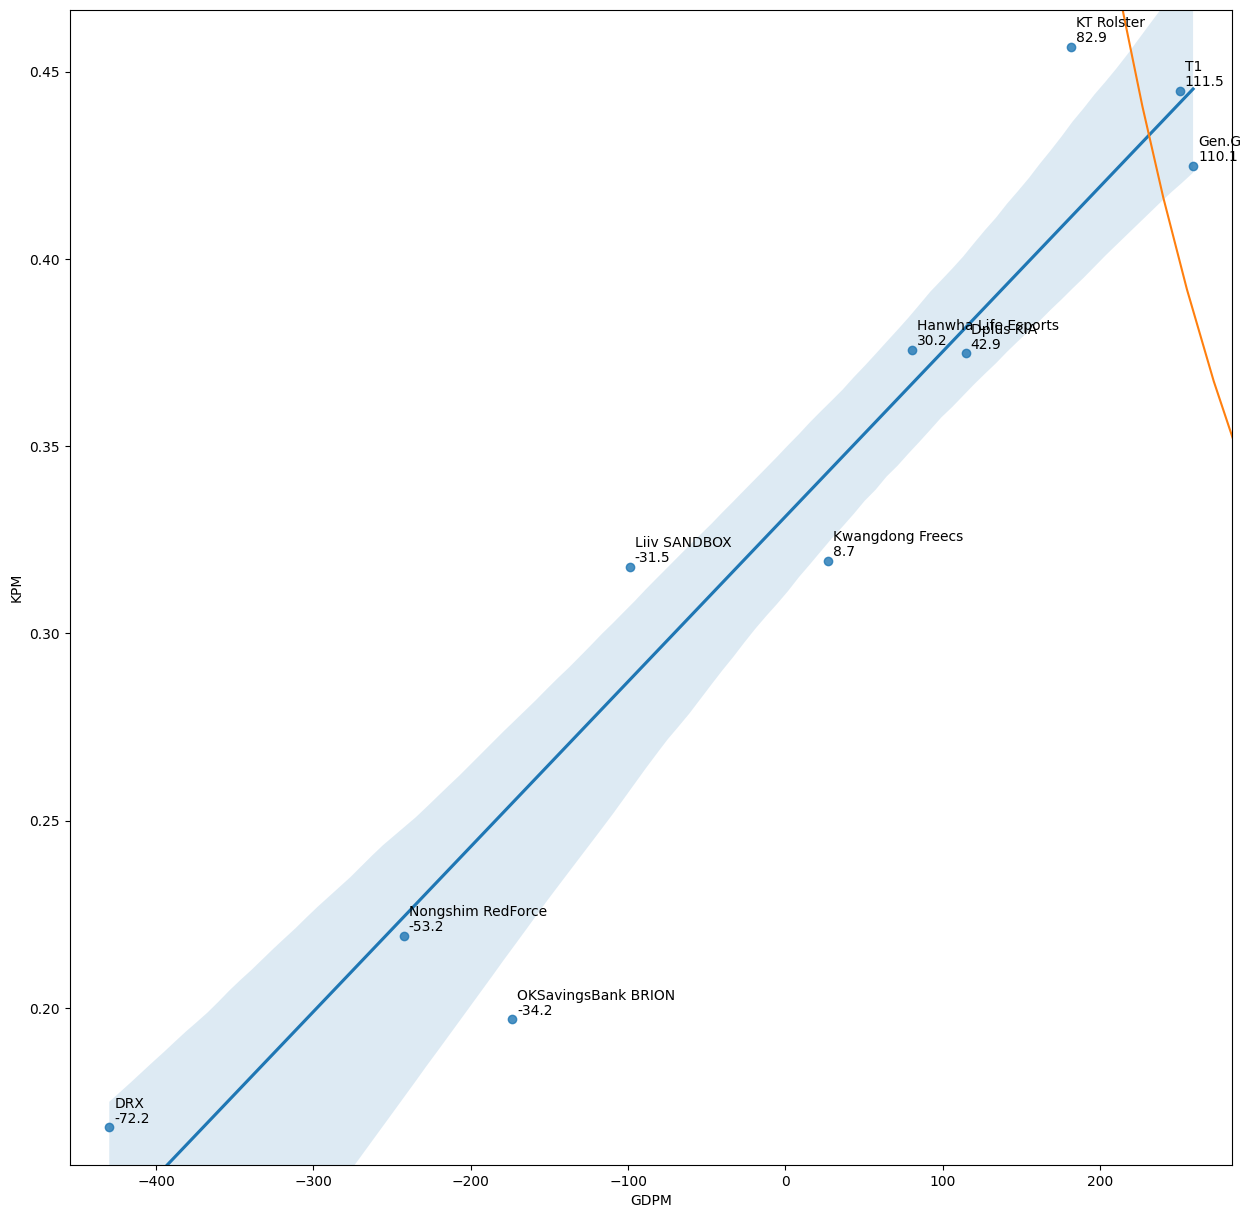

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.set_xlim(teams_stats["GDPM"].min() - 25, teams_stats["GDPM"].max() + 25)
ax.set_ylim(teams_stats["KPM"].min() - 0.01, teams_stats["KPM"].max() + 0.01)
ax = sns.regplot(data=teams_stats, x="GDPM", y="KPM")
y = np.linspace(0, 1.2)
x = 100 / y
sns.lineplot(x=x, y=y)
for idx, i in zip(teams_stats.index, range(teams_stats.shape[0])):
    row = teams_stats.iloc[i]
    plt.annotate(
        idx, xy=(row["GDPM"], row["KPM"]), xytext=(5, 20), textcoords="offset pixels"
    )
    plt.annotate(
        round(row["GDPM"] * row["KPM"], ndigits=1),
        xy=(row["GDPM"], row["KPM"]),
        xytext=(5, 5),
        textcoords="offset pixels",
    )

C:\Users\pjm58\AppData\Local\Temp\ipykernel_49340\934480505.py:6: RuntimeWarning:

divide by zero encountered in divide



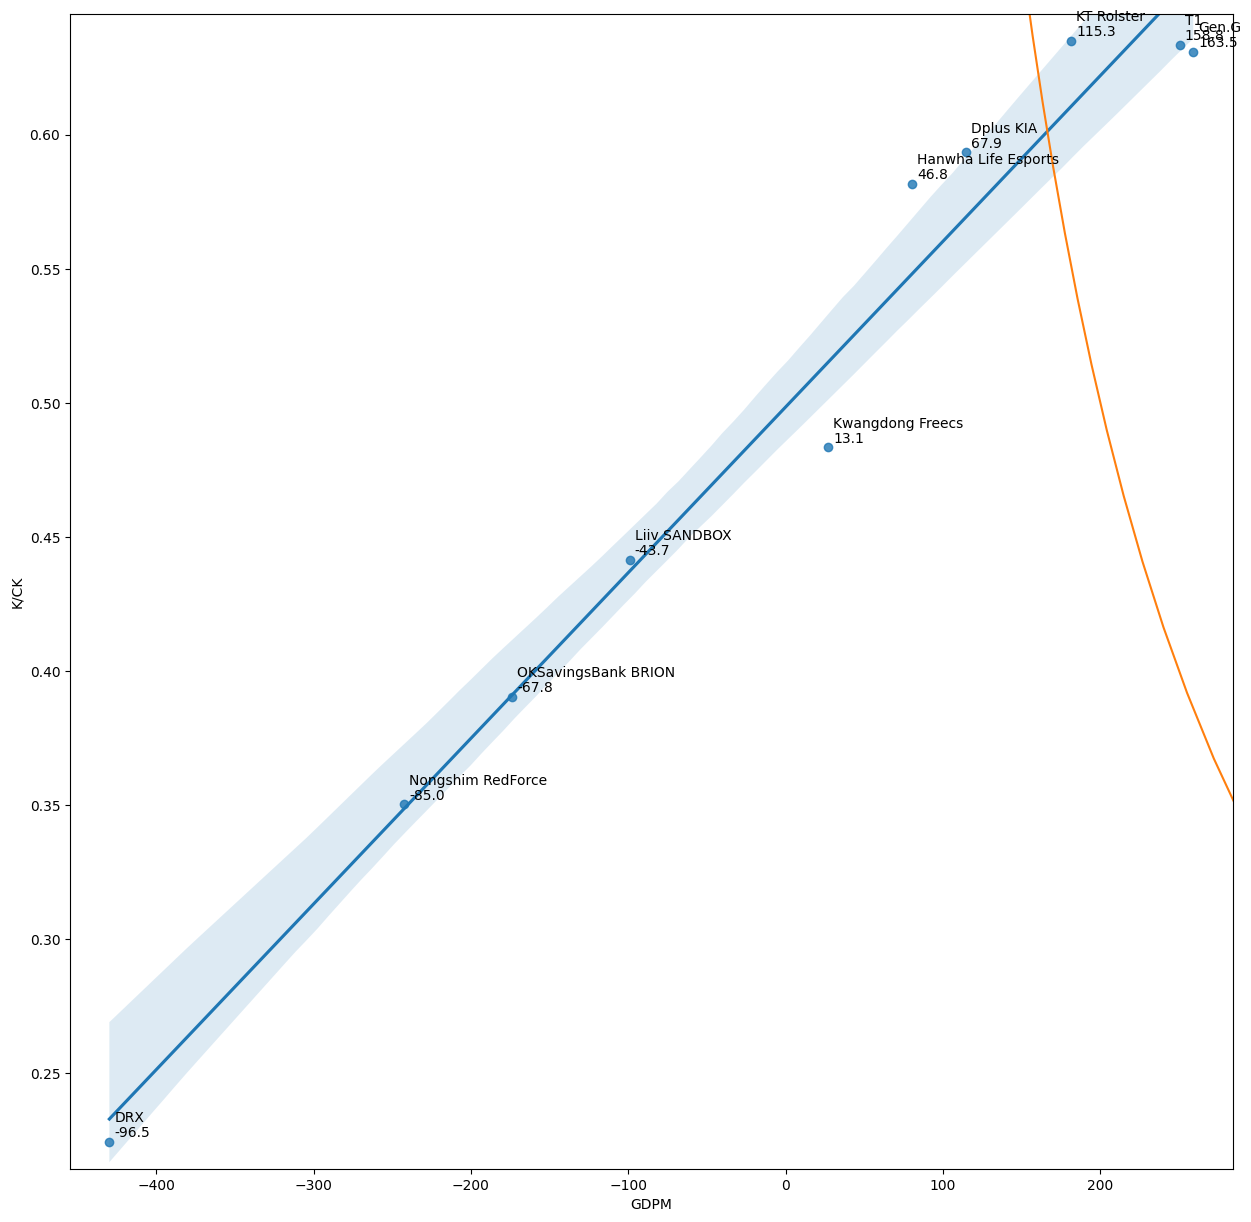

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.set_xlim(teams_stats["GDPM"].min() - 25, teams_stats["GDPM"].max() + 25)
ax.set_ylim(teams_stats["K/CK"].min() - 0.01, teams_stats["K/CK"].max() + 0.01)
ax = sns.regplot(data=teams_stats, x="GDPM", y="K/CK")
y = np.linspace(0, 1.2)
x = 100 / y
sns.lineplot(x=x, y=y)
for idx, i in zip(teams_stats.index, range(teams_stats.shape[0])):
    row = teams_stats.iloc[i]
    plt.annotate(
        idx, xy=(row["GDPM"], row["K/CK"]), xytext=(5, 20), textcoords="offset pixels"
    )
    plt.annotate(
        round(row["GDPM"] * row["K/CK"], ndigits=1),
        xy=(row["GDPM"], row["K/CK"]),
        xytext=(5, 5),
        textcoords="offset pixels",
    )

In [7]:
ROWS, COLUMNS = get_rows_columns(teams_stats)
min_value, max_value = get_min_max_value(teams_stats, columns)

fig = get_fig_subplots(teams_stats, ROWS, COLUMNS)
for i, team_name in enumerate(teams_stats.index):
    df = teams_stats.loc[team_name, columns]
    theta_list = get_theta_list(teams_stats, team_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=df, theta=theta_list, fill="toself", name=team_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [8]:
players_stats = pd.read_csv("./csv/stats/players_by_position.csv", index_col="Player")
players_stats.shape

(56, 19)

In [9]:
players_stats.columns

Index(['Position', 'Team', 'Games', 'Win', 'Loss', 'WinRate', 'Kills',
       'Deaths', 'Assists', 'KDA', 'DPM', 'CS', 'CSPM', 'Gold', 'GPM', 'KP',
       'KS', 'GS', 'ChampionsPlayed'],
      dtype='object')

In [10]:
players_stats['DPG'] = players_stats['DPM'].divide(players_stats['GPM'])

In [11]:
origin_columns = [
    "KDA",
    "KP",
    "KS",
    "DPM",
    "DPG",
    "CSPM",
    "GPM",
    "GS",
    "ChampionsPlayed",
]
columns = ["_" + col for col in origin_columns]
positions = ["Top", "Jungle", "Mid", "Bot", "Support"]

In [12]:
for position in positions:
    scaler = SCALER()
    df = players_stats.loc[players_stats["Position"] == position]
    players_stats.loc[
        players_stats["Position"] == position, columns
    ] = scaler.fit_transform(df[origin_columns])

In [13]:
df = players_stats.loc[players_stats["Position"] == positions[0]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    width=500 * COLUMNS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [14]:
df = players_stats.loc[players_stats["Position"] == positions[1]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    width=500 * COLUMNS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [15]:
df = players_stats.loc[players_stats["Position"] == positions[2]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [16]:
df = players_stats.loc[players_stats["Position"] == positions[3]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [17]:
df = players_stats.loc[players_stats["Position"] == positions[4]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False),
)
fig.update_traces(marker=dict(), selector=dict(type="scatterpolar"))
fig.show()

In [22]:
leagues = {
    "LCK": "LoL Champions Korea",
    "LPL": "Tencent LoL Pro League",
    "LEC": "LoL EMEA Championship",
    "LCS": "League of Legends Championship Series",
    "MSI": "Mid-Season Invitational",
    "WCS": "World Championship",
}

tournaments = get_tournaments(where=f'T.Year=2023 and T.League="{leagues["LCK"]}"')
tournaments

,Name,OverviewPage,DateStart,Date,League,Region,EventType,StandardName,Split,SplitNumber,TournamentLevel,IsQualifier,IsPlayoffs,IsOfficial,Year,DateStart__precision,Date__precision
0,LCK 2023 Spring,LCK/2023 Season/Spring Season,2023-01-18,2023-03-19,LoL Champions Korea,Korea,None,LCK 2023 Spring,Spring,1,Primary,0,0,1,2023,1,1
1,LCK 2023 Spring Playoffs,LCK/2023 Season/Spring Playoffs,2023-03-22,2023-04-09,LoL Champions Korea,Korea,Offline,LCK 2023 Spring Playoffs,Spring,1,Primary,0,1,1,2023,1,1
2,LCK 2023 Summer,LCK/2023 Season/Summer Season,2023-06-07,2023-08-06,LoL Champions Korea,Korea,None,LCK 2023 Summer,Summer,2,Primary,0,0,1,2023,1,1
3,LCK 2023 Summer Playoffs,LCK/2023 Season/Summer Playoffs,2023-08-08,2023-08-20,LoL Champions Korea,Korea,Offline,LCK 2023 Summer Playoffs,Summer,2,Primary,0,1,1,2023,1,1


In [23]:
page = "LCK/2023 Season/Summer Season"
match_schedules = get_match_schedule(where=f'MS.OverviewPage="{page}"').sort_values(
    by=["DateTime UTC"], ignore_index=True
)
match_schedules = match_schedules.loc[match_schedules['Winner'].isna()].reset_index(drop=True)
match_schedules.head()

,Team1,Team2,Team1Final,Team2Final,Winner,Team1Points,Team2Points,Team1PointsTB,Team2PointsTB,Team1Score,Team2Score,Team1Poster,Team2Poster,Team1Advantage,Team2Advantage,FF,IsNullified,Player1,Player2,MatchDay,DateTime UTC,HasTime,DST,IsFlexibleStart,IsReschedulable,OverrideAllowPredictions,OverrideDisallowPredictions,IsTiebreaker,OverviewPage,ShownName,ShownRound,BestOf,Round,Phase,N MatchInPage,Tab,N MatchInTab,N TabInPage,N Page,Patch,PatchPage,Hotfix,DisabledChampions,PatchFootnote,InitialN MatchInTab,InitialPageAndTab,GroupName,Stream,StreamDisplay,Venue,CastersPBP,CastersColor,Casters,MVP,MVPPoints,VodInterview,VodHighlights,InterviewWith,Recap,Reddit,QQ,Wanplus,WanplusId,PageAndTeam1,PageAndTeam2,Team1Footnote,Team2Footnote,Footnote,UniqueMatch,MatchId,DateTime UTC__precision
0,Dplus KIA,Gen.G,Dplus KIA,Gen.G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,2023-06-24 06:00:00,1,yes,0,NaN,0,0,0,LCK/2023 Season/Summer Season,LCK 2023 Summer,NaN,3,NaN,NaN,27,Week 3,7,3,1,13.11,Patch 13.11,NaN,NaN,NaN,7,NaN,NaN,https://www.twitch.tv/lck,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCK/2023 Season/Summer Season_Dplus KIA,LCK/2023 Season/Summer Season_Gen.G,NaN,NaN,NaN,LCK/2023 Season/Summer Season_Week 3_7,LCK/2023 Season/Summer Season_Week 3_7,0
1,T1,KT Rolster,T1,KT Rolster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,4,2023-06-24 08:30:00,1,yes,0,NaN,0,0,0,LCK/2023 Season/Summer Season,LCK 2023 Summer,NaN,3,NaN,NaN,28,Week 3,8,3,1,13.11,Patch 13.11,NaN,NaN,NaN,8,NaN,NaN,https://www.twitch.tv/lck,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCK/2023 Season/Summer Season_T1,LCK/2023 Season/Summer Season_KT Rolster,NaN,NaN,NaN,LCK/2023 Season/Summer Season_Week 3_8,LCK/2023 Season/Summer Season_Week 3_8,0
2,Nongshim RedForce,DRX,Nongshim RedForce,DRX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,5,2023-06-25 06:00:00,1,yes,0,NaN,0,0,0,LCK/2023 Season/Summer Season,LCK 2023 Summer,NaN,3,NaN,NaN,29,Week 3,9,3,1,13.11,Patch 13.11,NaN,NaN,NaN,9,NaN,NaN,https://www.twitch.tv/lck,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCK/2023 Season/Summer Season_Nongshim RedForce,LCK/2023 Season/Summer Season_DRX,NaN,NaN,NaN,LCK/2023 Season/Summer Season_Week 3_9,LCK/2023 Season/Summer Season_Week 3_9,0
3,OKSavingsBank BRION,Hanwha Life Esports,OKSavingsBank BRION,Hanwha Life Esports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,5,2023-06-25 08:30:00,1,yes,0,NaN,0,0,0,LCK/2023 Season/Summer Season,LCK 2023 Summer,NaN,3,NaN,NaN,30,Week 3,10,3,1,13.11,Patch 13.11,NaN,NaN,NaN,10,NaN,NaN,https://www.twitch.tv/lck,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCK/2023 Season/Summer Season_OKSavingsBank BRION,LCK/2023 Season/Summer Season_Hanwha Life Esports,NaN,NaN,NaN,LCK/2023 Season/Summer Season_Week 3_10,LCK/2023 Season/Summer Season_Week 3_10,0
4,Hanwha Life Esports,Dplus KIA,Hanwha Life Esports,Dplus KIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1,2023-06-28 08:00:00,1,yes,0,NaN,0,0,0,LCK/2023 Season/Summer Season,LCK 2023 Summer,NaN,3,NaN,NaN,31,Week 4,1,4,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,https://www.twitch.tv/lck,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCK/2023 Season/Summer Season_Hanwha Life Esports,LCK/2023 Season/Summer Season_Dplus KIA,NaN,NaN,NaN,LCK/2023 Season/Summer Season_Week 4_1,LCK/2023 Season/Summer Season_Week 4_1,0


In [40]:
team_names = reduce(
    lambda x, y: x + y,
    map(
        lambda x: [x.Team1, x.Team2],
        match_schedules.head(2)[["Team1", "Team2"]].itertuples(),
    ),
)
team_names

['Dplus KIA', 'Gen.G', 'T1', 'KT Rolster']

In [41]:
target_teams_stats = teams_stats.loc[team_names]
target_teams_stats

,Games,Win,Loss,WinRate,KD,CKPM,GameDuration,WinGameDuration,LossGameDuration,GPM,GDPM,KPM,_KD,_CKPM,_KPM,_GPM,_GDPM,K/CK
Team,,,,,,,,,,,,,,,,,,
Dplus KIA,12.0,7.0,5.0,0.583333,1.457447,0.631555,30.906944,30.061905,32.090000,1837.881009,114.495395,0.374791,0.846539,0.520182,0.716626,0.735908,0.790096,0.593441
Gen.G,12.0,10.0,2.0,0.833333,1.658824,0.673471,27.709722,27.840000,27.058333,1936.876723,259.105160,0.424899,1.000000,0.691667,0.890341,1.000000,1.000000,0.630909
T1,12.0,9.0,3.0,0.750000,1.622449,0.702168,31.047222,29.951852,34.333333,1924.784475,250.631041,0.444854,0.972280,0.809070,0.959522,0.967741,0.987700,0.633544
KT Rolster,12.0,9.0,3.0,0.750000,1.588889,0.718916,27.948611,28.159259,27.316667,1917.934730,181.627248,0.456530,0.946706,0.877592,1.000000,0.949468,0.887539,0.635025


In [44]:
origin_columns = ["KD", "CKPM", "KPM", "GPM", "GDPM"]
columns = ["_" + col for col in origin_columns]

In [45]:
ROWS, COLUMNS = get_rows_columns(target_teams_stats, c=2)
min_value, max_value = 0, 1

fig = get_fig_subplots(target_teams_stats, ROWS, COLUMNS)
for i, team_name in enumerate(target_teams_stats.index):
    df = target_teams_stats.loc[team_name, columns]
    theta_list = get_theta_list(target_teams_stats, team_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=df, theta=theta_list, fill="toself", name=team_name),
        row=r,
        col=c,
    )

fig.update_layout(height=400 * ROWS, showlegend=False, title=dict(y=1))
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [46]:
origin_columns = [
    "KDA",
    "KP",
    "KS",
    "DPM",
    "DPG",
    "CSPM",
    "GPM",
    "GS",
    "ChampionsPlayed",
]
columns = ["_" + col for col in origin_columns]
positions = ["Top", "Jungle", "Mid", "Bot", "Support"]

In [62]:
target_players_stats = players_stats.loc[
    players_stats["Team"].isin(team_names)
].sort_values(by=["Team"], key=lambda x: [team_names.index(value) for value in x])
target_players_stats.head()

,Position,Team,Games,Win,Loss,WinRate,Kills,Deaths,Assists,KDA,DPM,CS,CSPM,Gold,GPM,KP,KS,GS,ChampionsPlayed,DPG,_KDA,_KP,_KS,_DPM,_DPG,_CSPM,_GPM,_GS,_ChampionsPlayed
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Deft,Bot,Dplus KIA,9,6,3,0.666667,5.555556,2.000000,4.444444,5.000000,745.486625,306.666667,9.780109,15128.444444,487.970713,0.762712,0.423729,0.264956,6,1.527728,0.500970,0.612874,0.559322,1.000000,0.812249,0.474639,0.803440,0.949562,0.750000
Rahel,Bot,Dplus KIA,3,1,2,0.333333,2.333333,1.666667,1.333333,2.200000,448.467087,314.666667,10.064403,13729.333333,441.960263,0.578947,0.368421,0.253446,3,1.014723,0.137677,0.000000,0.292726,0.010864,0.000969,0.603968,0.447169,0.532079,0.000000
Canyon,Jungle,Dplus KIA,12,7,5,0.583333,2.000000,1.666667,5.916667,4.750000,338.836730,184.333333,6.051492,10554.166667,345.496109,0.693431,0.175182,0.187243,8,0.980725,0.786147,0.354975,0.022125,1.000000,1.000000,0.753372,0.619617,0.342338,1.000000
ShowMaker,Mid,Dplus KIA,12,7,5,0.583333,3.000000,1.166667,5.500000,7.285714,625.885796,282.000000,9.201987,12584.333333,411.283227,0.744526,0.262774,0.223261,5,1.521788,1.000000,1.000000,1.000000,0.943276,0.770337,0.905119,0.907314,0.862117,0.666667
Kellin,Support,Dplus KIA,12,7,5,0.583333,0.833333,1.250000,8.750000,7.666667,165.622959,26.916667,0.901908,7457.416667,244.184787,0.839416,0.072993,0.132303,6,0.678269,0.881582,1.000000,0.930657,0.462972,0.349568,0.742282,0.658924,0.549882,0.250000


In [65]:
df = target_players_stats.loc[target_players_stats['Position'] == positions[0]]
min_value, max_value = 0, 1

ROWS, COLUMNS = get_rows_columns(df, 2)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [66]:
df = target_players_stats.loc[target_players_stats['Position'] == positions[1]]
min_value, max_value = 0, 1

ROWS, COLUMNS = get_rows_columns(df, 2)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [68]:
df = target_players_stats.loc[target_players_stats['Position'] == positions[2]]
min_value, max_value = 0, 1

ROWS, COLUMNS = get_rows_columns(df, 2)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [69]:
df = target_players_stats.loc[target_players_stats['Position'] == positions[3]]
min_value, max_value = 0, 1

ROWS, COLUMNS = get_rows_columns(df, 2)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()

In [70]:
df = target_players_stats.loc[target_players_stats['Position'] == positions[4]]
min_value, max_value = 0, 1

ROWS, COLUMNS = get_rows_columns(df, 2)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(
    radialaxis=dict(range=[min_value - 0.2, max_value + 0.2], visible=False)
)
fig.show()